In [1]:
hhs_hospital_csv = 'hhs_hopsital.csv'

In [2]:
!wget -O {hhs_hospital_csv} https://healthdata.gov/resource/uqq2-txqb.csv

--2021-06-06 14:30:01--  https://healthdata.gov/resource/uqq2-txqb.csv
Resolving healthdata.gov (healthdata.gov)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to healthdata.gov (healthdata.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘hhs_hopsital.csv’

hhs_hopsital.csv        [  <=>               ] 664.83K  1.73MB/s    in 0.4s    

2021-06-06 14:30:02 (1.73 MB/s) - ‘hhs_hopsital.csv’ saved [680782]



In [40]:
import os
import re
import plotly.express as px
import pandas as pd
import numpy as np
px.set_mapbox_access_token(os.environ['MAPBOXKEY_CAVAX'])

In [35]:
df_hhs_hospital = pd.read_csv(hhs_hospital_csv)

In [51]:
adult_covid_patients = 'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg'
hover_data = [
    adult_covid_patients,
    'total_adult_patients_hospitalized_confirmed_covid_7_day_avg',
    'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg',
    'total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg',
]

In [37]:
re_point = re.compile('POINT\s*\((.+)\s+(.+)\)')
def split_point(point):
    if point is np.nan:
        return np.nan, np.nan
    try:
        lon, lat =  re.match(re_point, point).groups()
    except TypeError:
        print(point)
    return tuple(map(float, (lat, lon)))
assert split_point('POINT(-118 34)') == (34, -118)
assert split_point('POINT(-117.3 35.6)') == (35.6, -117.3)

In [38]:
df_hhs_hospital['lat'], df_hhs_hospital['lon'] = zip(
    *df_hhs_hospital['geocoded_hospital_address'].apply(split_point)
)

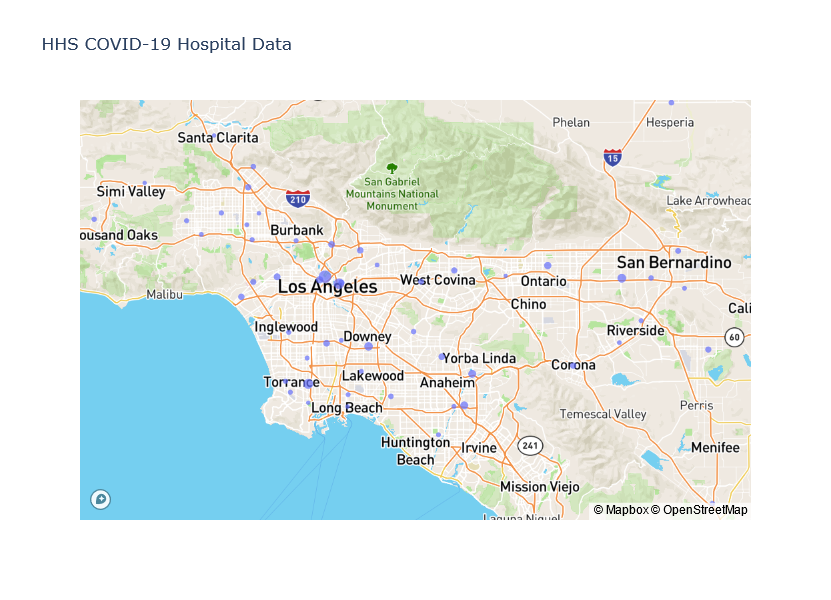

In [52]:
df_has_patients = df_hhs_hospital[df_hhs_hospital[adult_covid_patients]>=0]
fig = px.scatter_mapbox(
    data_frame=df_has_patients,
    lat='lat',
    lon='lon',
    hover_name='hospital_name',
    hover_data=hover_data,
    size=adult_covid_patients,
#     color='is_metro_micro',
    mapbox_style='streets',
    center={'lat': 34, 'lon': -118},
    title='HHS COVID-19 Hospital Data',
    height=600
)
fig.show()